In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

random_data = IntervalData.make_interval_blobs(n_samples=100, n_clusters=3, n_dims = 4)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
    Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0          8.657410         9.936666         5.278065         7.897514   
1         -9.718996        -7.561077         8.096145         9.944752   
2         -0.831065         1.858064        -4.559022        -1.010011   
3         -0.202766         0.854644        -3.801558        -0.743233   
4          8.439918        11.433248         5.129413         8.021564   
..              ...              ...              ...              ...   
95        -0.635873         0.926851        -4.247528        -1.186412   
96        -0.572210         0.010658        -2.573960        -0.463234   
97        -0.330351         0.606012        -4.035594        -1.598475   
98         0.099382         0.248463        -2.365557         0.013290   
99        -9.250313        -6.786590         8.983901        10.456076   

    Feature_3_lower  Feature_3_upper  Feature_4_lower  Feature_4_upper  
0          8.3

In [2]:

hmodel = IntervalAgglomerativeClustering(n_clusters=3, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[2 0 1 1 2 1 2 0 2 2 1 1 2 2 1 0 2 0 2 1 0 0 2 0 0 2 2 1 0 2 0 2 1 2 2 0 1
 1 0 0 1 0 1 0 2 1 2 2 0 1 0 0 2 0 0 2 0 2 0 2 0 1 1 1 0 2 0 2 2 1 2 1 0 0
 1 1 1 0 2 1 1 0 0 1 1 2 0 1 2 0 2 2 0 1 2 1 1 1 1 0]
{'linkage_matrix': array([[ 80.        ,  95.        ,   1.26732826,   2.        ],
       [ 96.        ,  98.        ,   1.31455556,   2.        ],
       [ 15.        ,  28.        ,   1.43865216,   2.        ],
       [ 33.        ,  59.        ,   1.48648411,   2.        ],
       [  2.        ,  37.        ,   1.545992  ,   2.        ],
       [ 71.        ,  97.        ,   1.60519061,   2.        ],
       [ 64.        ,  86.        ,   1.62150892,   2.        ],
       [ 14.        , 101.        ,   1.68773857,   3.        ],
       [ 78.        , 103.        ,   1.71291593,   3.        ],
       [ 62.        ,  87.        ,   1.73926219,   2.        ],
       [ 57.        ,  70.        ,   1.74563536,   2.        ],
       [  9.        ,  13.        ,   1.7672777 ,   2.        

Requested clusters: 5, Actual clusters: 5


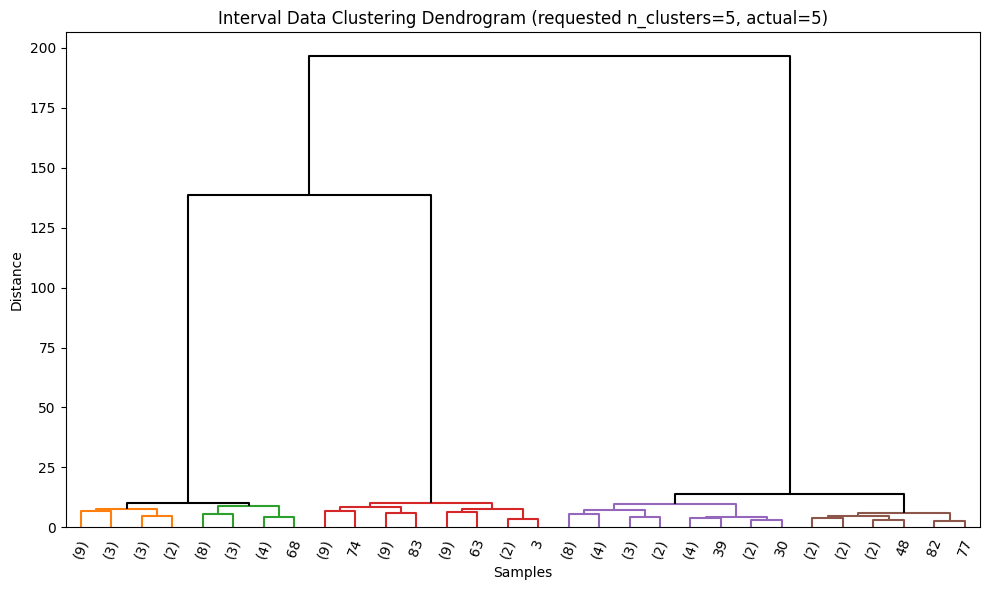

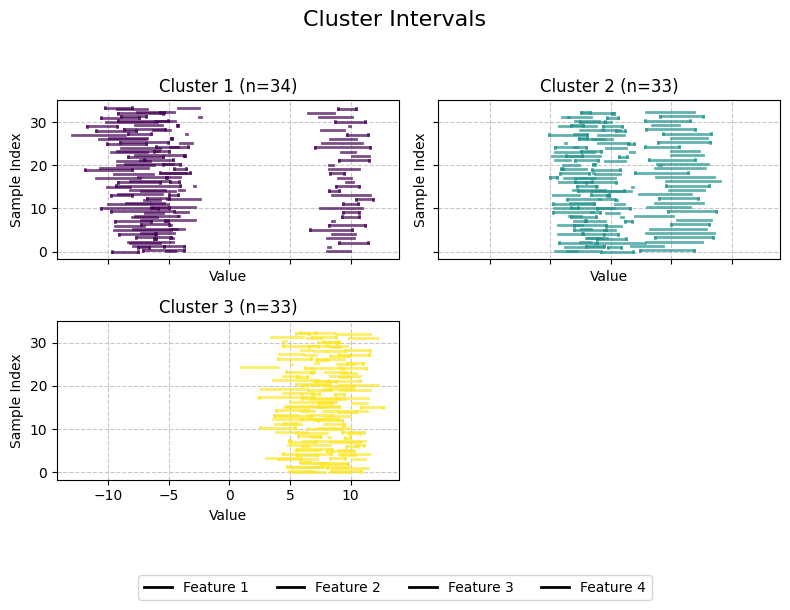

In [3]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='top',
    show_leaf_counts=True,
    figsize=(10,6)
)

fig, ax = Dendrogram.visualize_intervals(intervals = random_data.get_intervals() , labels = hmodel.labels_)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

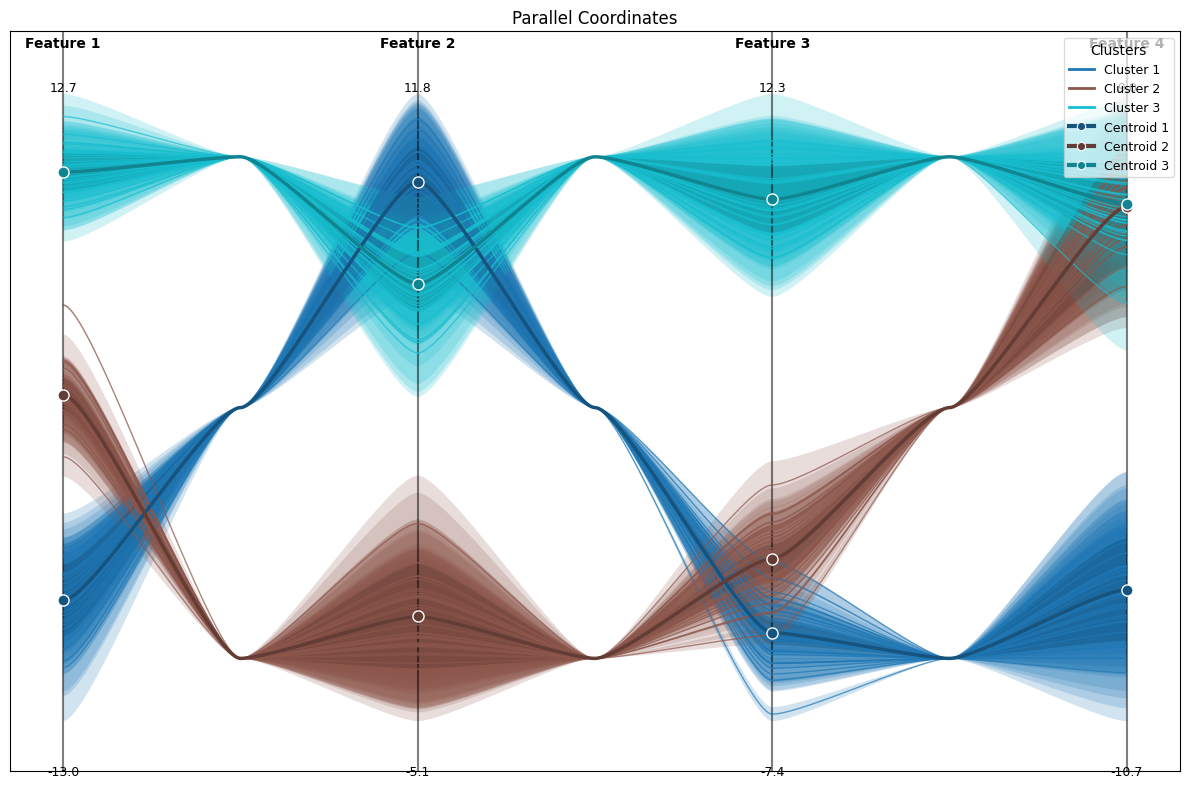

In [4]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True)


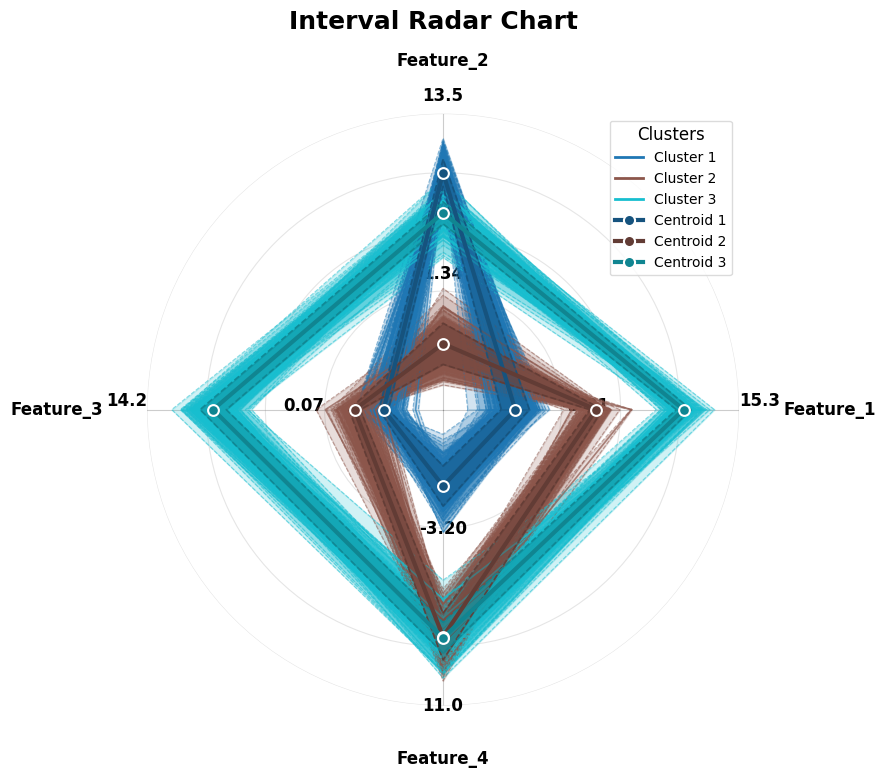

In [5]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

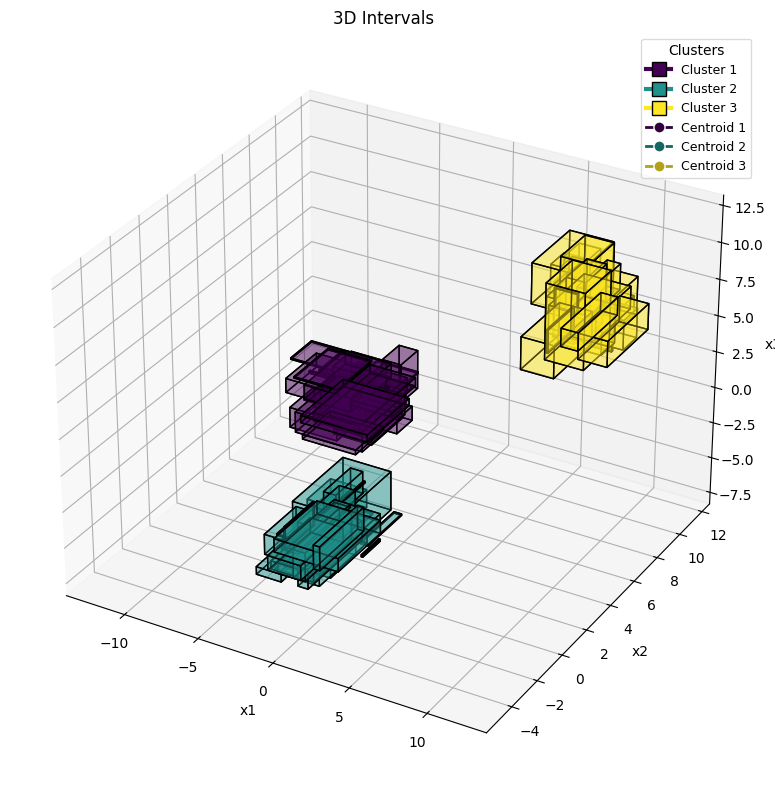

In [6]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= hmodel.centroids_, labels = hmodel.labels_)